# # EE769 Assignment-3 
**Mirza Aman Baig(213230007)  
Rohan Appaso More(213230013)**

**Question No. 2**

 Train k-means, and find the appropriate number of k

In [1]:
#importing some important useful libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing training data
train_df = pd.read_csv("DataClustering.csv")

In [3]:
train_df.head(2)

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035


In [4]:
#checking the unique values
for col in train_df.columns.values:
  list_vals = pd.unique(train_df[col])
  print(col + " is of type " + str(train_df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(train_df[col].isnull().sum(axis=0)) + " null entries")
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:len(list_str)-1])

x1 is of type float64 has 351 unique values, and 0 null entries
x2 is of type float64 has 351 unique values, and 0 null entries
x3 is of type float64 has 351 unique values, and 0 null entries
x4 is of type float64 has 351 unique values, and 0 null entries


**Visualizing the data**

In [5]:
train_df.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


We can see here standard deviation is higher for x3 column

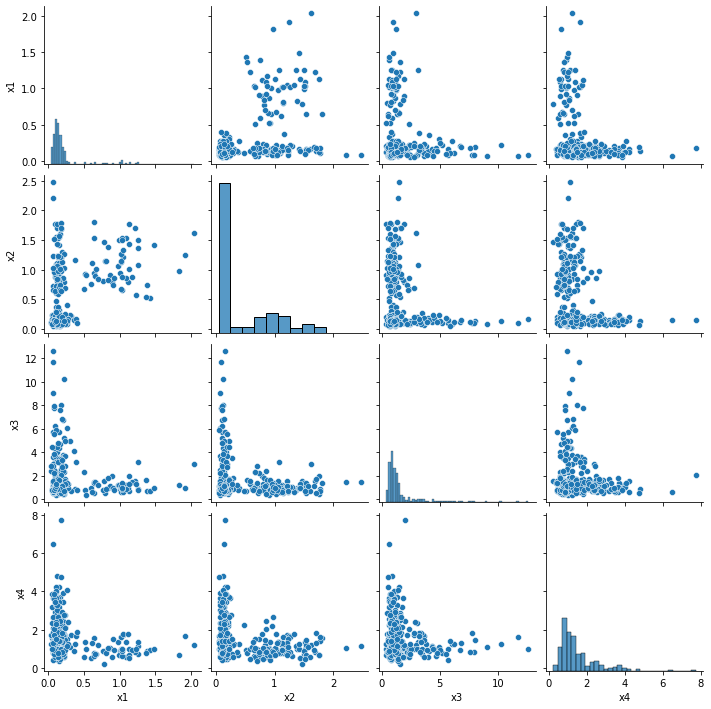

In [6]:
sns.pairplot(train_df)

Here we can see that our data is not in standardized and normalized form  
As pairplot show the skewed view which does not give us a proper look of relation among the points  
So we neet to apply normalizing to the data

**Normalizing and Standardizing the data**

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(train_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
num_df = pd.DataFrame(normalized_df)

In [8]:
num_df.head(2)

,0,1,2,3
0,0.647397,0.716359,-0.163188,-0.202672
1,0.792891,0.557146,-0.122855,-0.214055


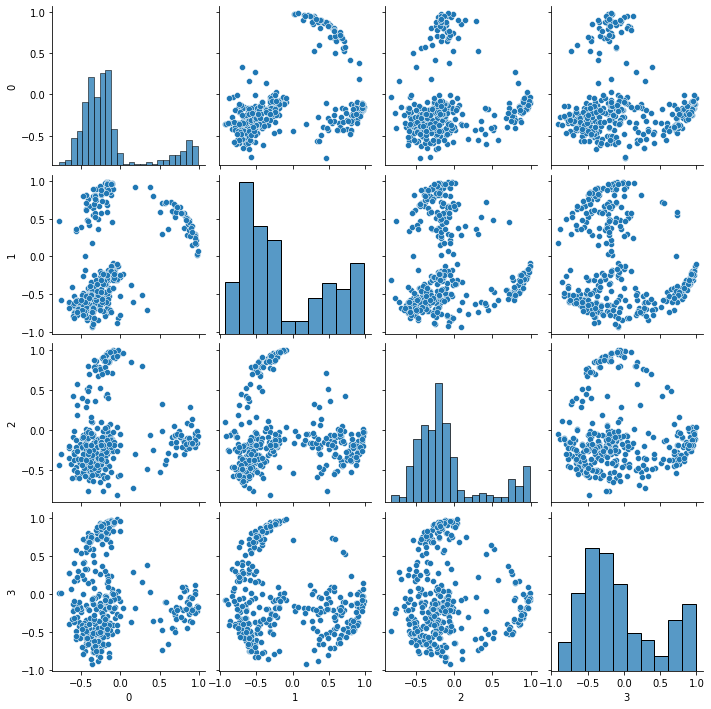

In [9]:
sns.pairplot(num_df)

After Normalizing the data now it looks perfect and defined  
It gives understanding of the data and relation between the features  
Now we can perform operations on the data to find the number of clusters

**Reducing the Dimensions**

In [10]:
# Reducing the dimensions of the data 
pca = PCA(0.9) #here we are choosing 90% of the important data using PCA
X_principal = pca.fit_transform(num_df) 
X_principal = pd.DataFrame(X_principal) 

  
X_principal.head(2)

,0,1,2,3
0,1.083006,0.266177,0.014503,0.306406
1,1.012710,0.247557,0.101452,0.494622


Note that here number of components we depend on percentage inside the PCA for 0.9 we are get 4 components

In [11]:
# changing the name of principle columns
X_principal.columns = ['P1', 'P2','P3','P4'] 
X_principal.head(2)

,P1,P2,P3,P4
0,1.083006,0.266177,0.014503,0.306406
1,1.012710,0.247557,0.101452,0.494622


# K-Means Clustering

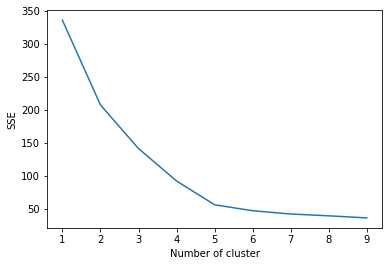

In [12]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


**By ELBOW method**

**Looking at the above graph we can say that number of clusters found by K-means is 5**

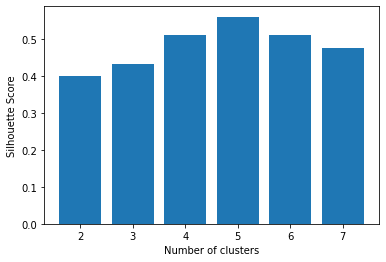

[0.40001453585607105, 0.4318005094219227, 0.5103291168061046, 0.5595129410714107, 0.5088741082946606, 0.47564395697065964]


In [13]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 
print(silhouette_scores)

Other method of finding number of clusters is Silhouette Score  
By looking at histogram of silhouette score vs number of clusters we can see that score is highest form 5 nomber of clusters  
So here also we get **5** number of clusters

In [14]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_principal)

KMeans(n_clusters=5)

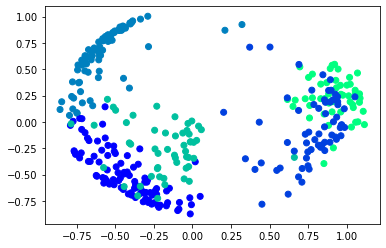

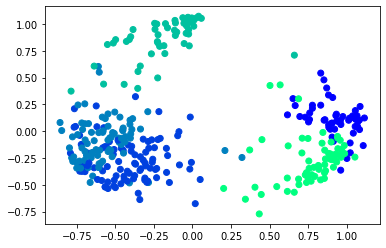

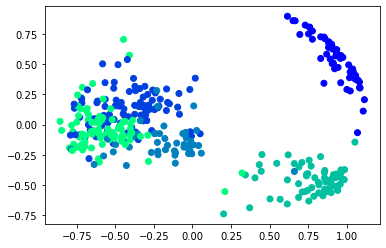

In [111]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = KMeans(n_clusters = 5).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()
plt.scatter(X_principal['P1'], X_principal['P3'],
           c = KMeans(n_clusters = 5).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()
plt.scatter(X_principal['P1'], X_principal['P4'],
           c = KMeans(n_clusters = 5).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()


Here we are tying to visualize scatter point of data wrt any two columns for 5 number of clusters

# T-SNE embedding

In [16]:
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50)


In [17]:
tsne_features=m.fit_transform(X_principal)
tsne_features[1:4,:]

c:\users\rohan\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ -8.484375 , -30.329618 ],
       [ -8.4202385, -31.82022  ],
       [ -8.1087675, -30.836647 ]], dtype=float32)

https://www.youtube.com/watch?v=85XaciPBCkw

In [18]:
num_df['x']=tsne_features[:,0]
num_df['y']=tsne_features[:,1]

**Visualizing t-sne**

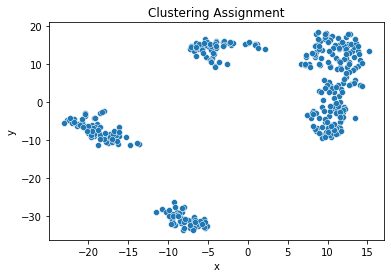

In [19]:
sns.scatterplot(x='x', y='y',data=num_df)
plt.title("Clustering Assignment")
plt.show()

After aplying t-sne embedding  to the clustering data we can see the plot of clusters which are away from each other and that looks perfect